In [3]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

/var/folders/8g/3tkx72hn7m160m67m134d1z40000gn/T/ipykernel_4738/204452124.py:20: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [4]:
Surface_Data = Path("Data")

In [5]:
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))

In [6]:
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))

In [7]:
Surface_JPG_Path_Series = pd.Series(Surface_JPG_Path,name="JPG").astype(str)
Surface_Labels_Series = pd.Series(Surface_Labels,name="CATEGORY")

In [8]:
Main_Surface_Data = pd.concat([Surface_JPG_Path_Series,Surface_Labels_Series],axis=1)

In [9]:
print(Main_Surface_Data.head(-1))

                             JPG  CATEGORY
0      Data/Positive/16679_1.jpg  Positive
1        Data/Positive/04354.jpg  Positive
2        Data/Positive/02725.jpg  Positive
3      Data/Positive/11369_1.jpg  Positive
4        Data/Positive/19463.jpg  Positive
...                          ...       ...
39994    Data/Negative/09669.jpg  Negative
39995    Data/Negative/11026.jpg  Negative
39996    Data/Negative/05053.jpg  Negative
39997    Data/Negative/15240.jpg  Negative
39998    Data/Negative/03422.jpg  Negative

[39999 rows x 2 columns]


In [10]:
Main_Surface_Data = Main_Surface_Data.sample(frac=1).reset_index(drop=True)

In [11]:
print(Main_Surface_Data.head(-1))

                           JPG  CATEGORY
0      Data/Negative/14038.jpg  Negative
1      Data/Positive/04493.jpg  Positive
2      Data/Positive/00932.jpg  Positive
3      Data/Negative/06165.jpg  Negative
4      Data/Positive/09290.jpg  Positive
...                        ...       ...
39994  Data/Negative/03242.jpg  Negative
39995  Data/Negative/07576.jpg  Negative
39996  Data/Negative/16869.jpg  Negative
39997  Data/Positive/01488.jpg  Positive
39998  Data/Negative/18723.jpg  Negative

[39999 rows x 2 columns]


In [12]:
plt.style.use("dark_background")

In [13]:
Positive_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Positive"]
Negative_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Negative"]

Positive_Surface = Positive_Surface.reset_index()
Negative_Surface = Negative_Surface.reset_index()

In [14]:
def simple_vision(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    plt.xlabel(Reading_Img.shape)
    plt.ylabel(Reading_Img.size)
    plt.imshow(Reading_Img)

In [15]:
def canny_vision(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    Canny_Img = cv2.Canny(Reading_Img,90,100)
    
    plt.xlabel(Canny_Img.shape)
    plt.ylabel(Canny_Img.size)
    plt.imshow(Canny_Img)

In [16]:
def threshold_vision(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    _,Threshold_Img = cv2.threshold(Reading_Img,130,255,cv2.THRESH_BINARY_INV)
    
    plt.xlabel(Threshold_Img.shape)
    plt.ylabel(Threshold_Img.size)
    plt.imshow(Threshold_Img)

In [17]:
def threshold_canny(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    _,Threshold_Img = cv2.threshold(Reading_Img,130,255,cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img,90,100)
    
    plt.xlabel(Canny_Img.shape)
    plt.ylabel(Canny_Img.size)
    plt.imshow(Canny_Img)

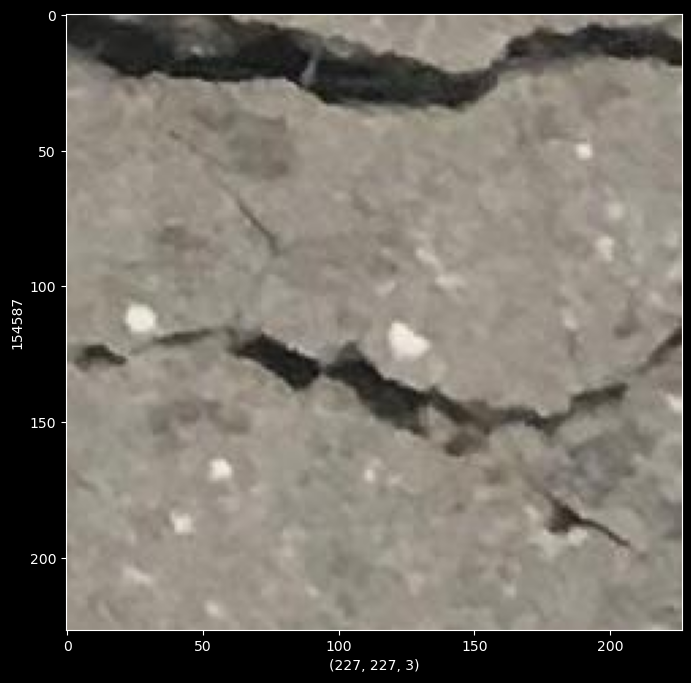

In [20]:
simple_vision(Main_Surface_Data["JPG"][100])

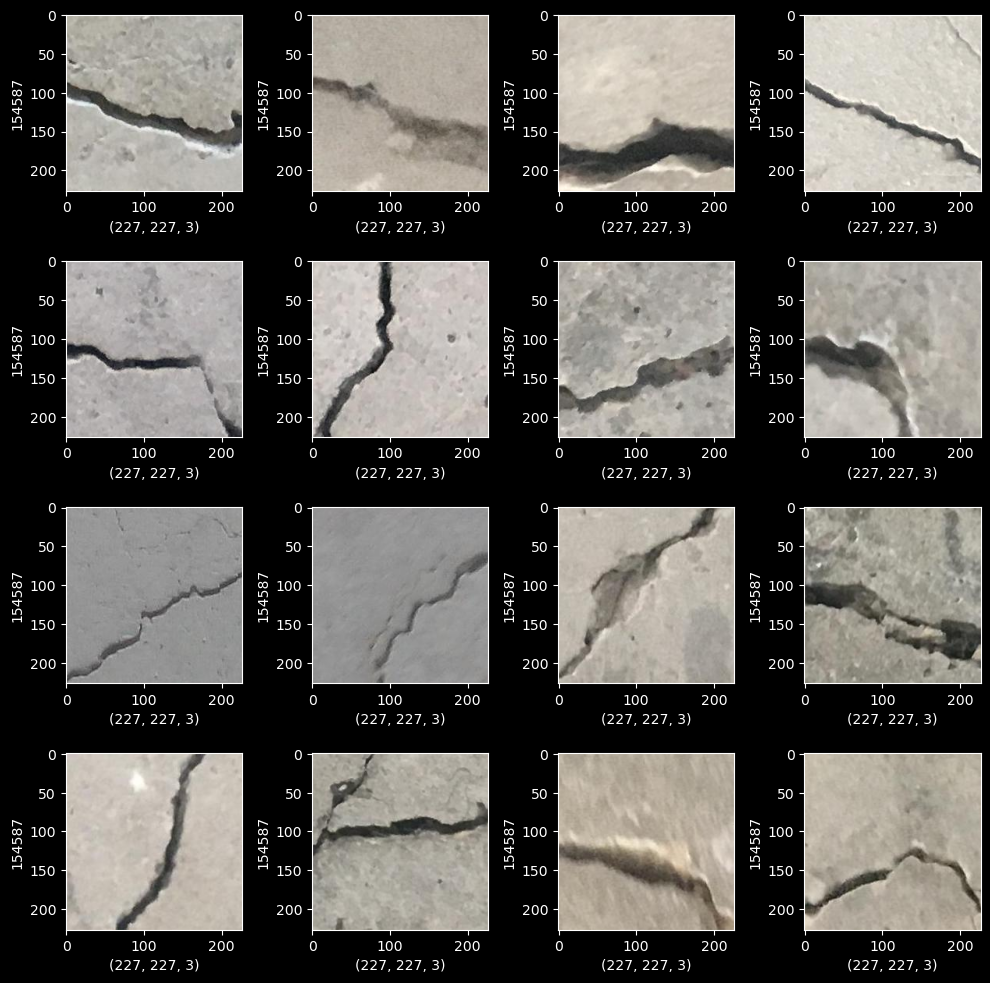

In [21]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()

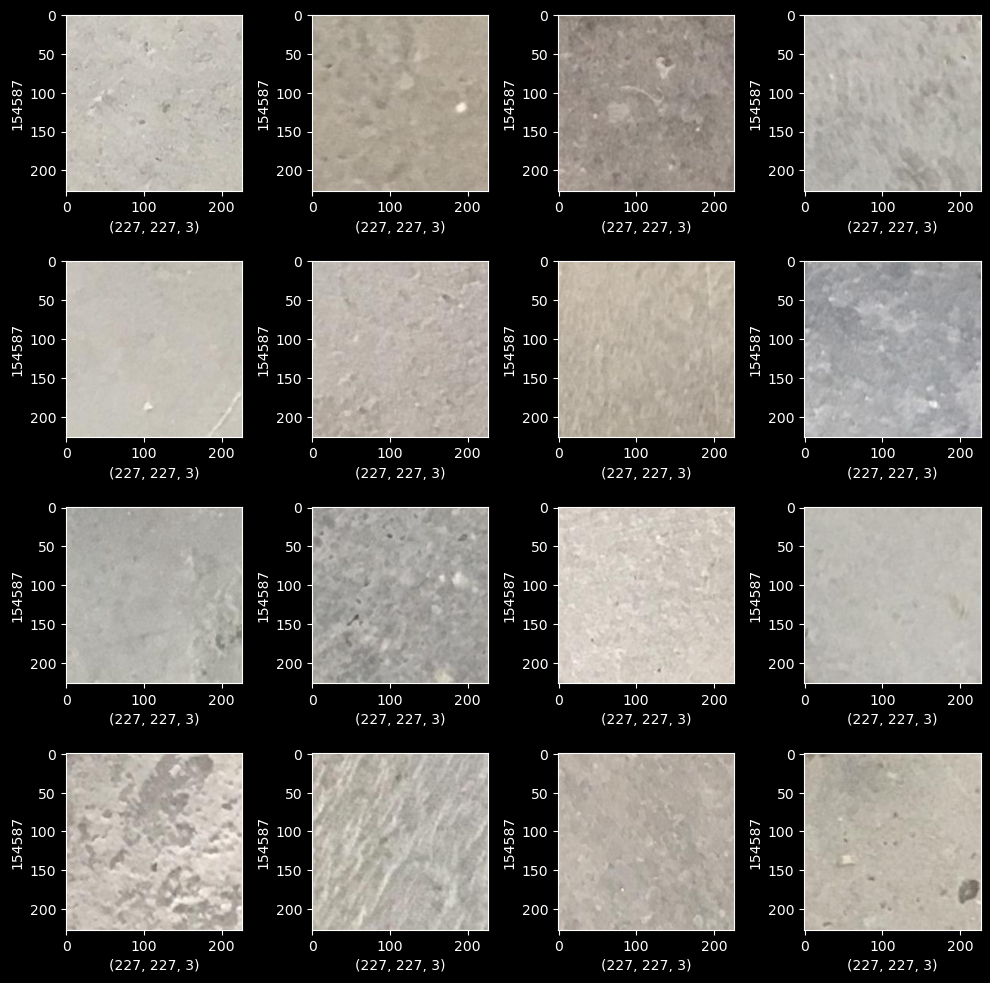

In [22]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Negative_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()

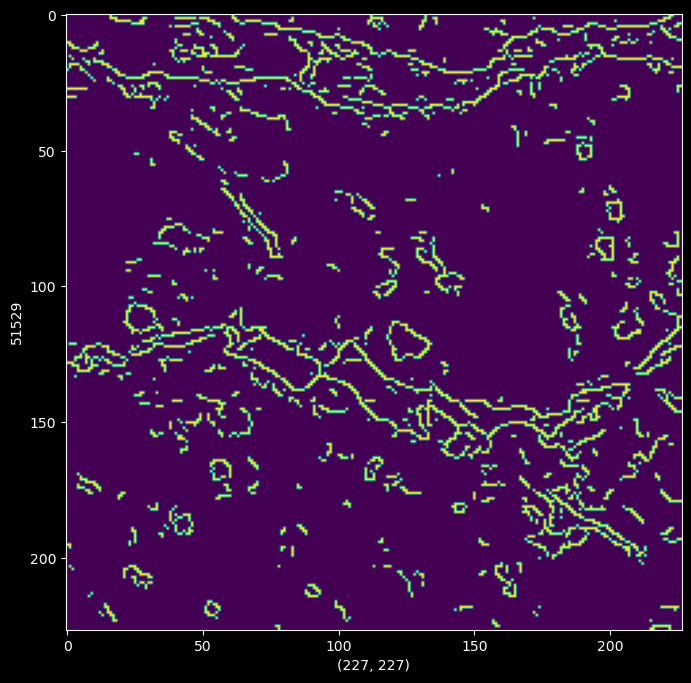

In [23]:
canny_vision(Main_Surface_Data["JPG"][100])

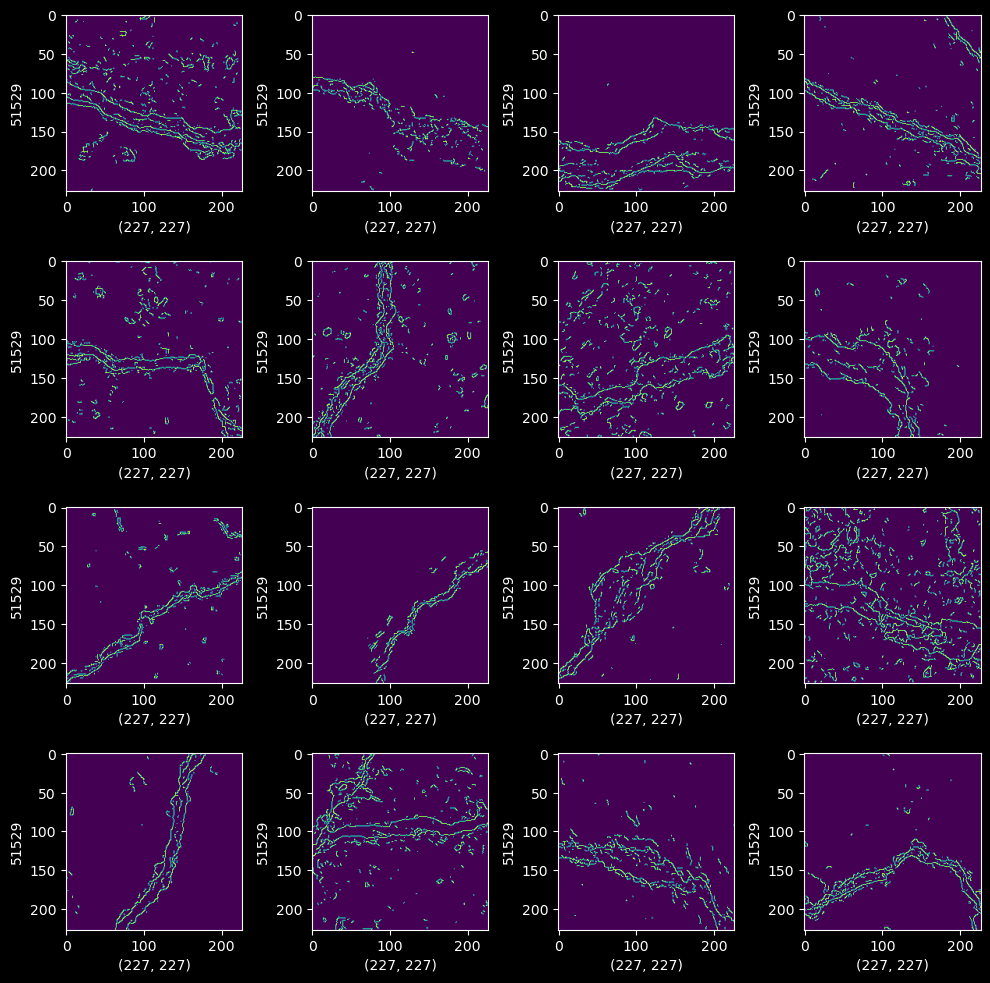

In [24]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    Canny_Img = cv2.Canny(Reading_Img,90,100)
    
    operations.set_xlabel(Canny_Img.shape)
    operations.set_ylabel(Canny_Img.size)
    operations.imshow(Canny_Img)
    
plt.tight_layout()
plt.show()

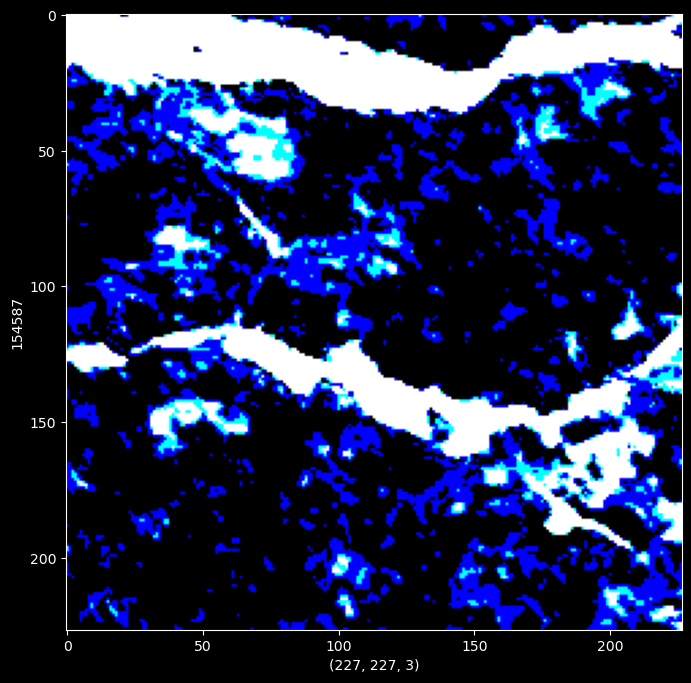

In [25]:
threshold_vision(Main_Surface_Data["JPG"][100])

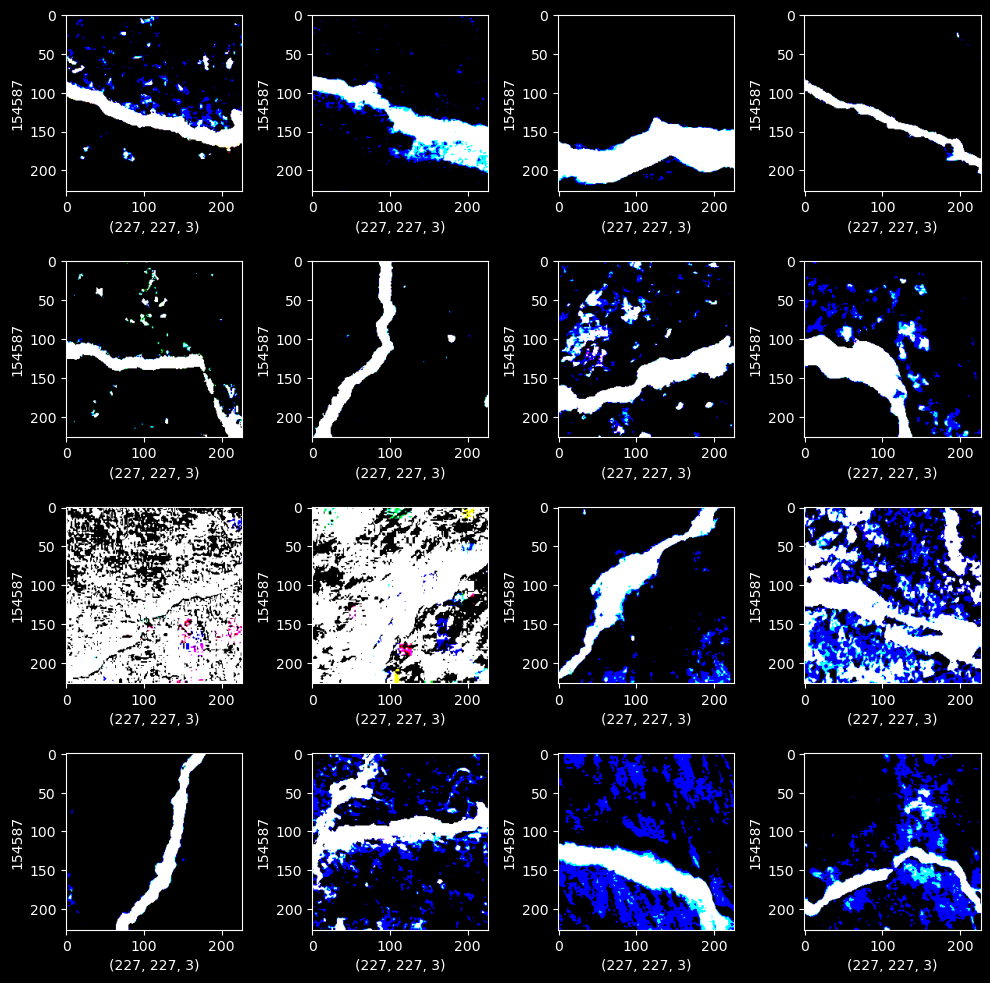

In [26]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    
    operations.set_xlabel(Threshold_Img.shape)
    operations.set_ylabel(Threshold_Img.size)
    operations.imshow(Threshold_Img)
    
plt.tight_layout()
plt.show()

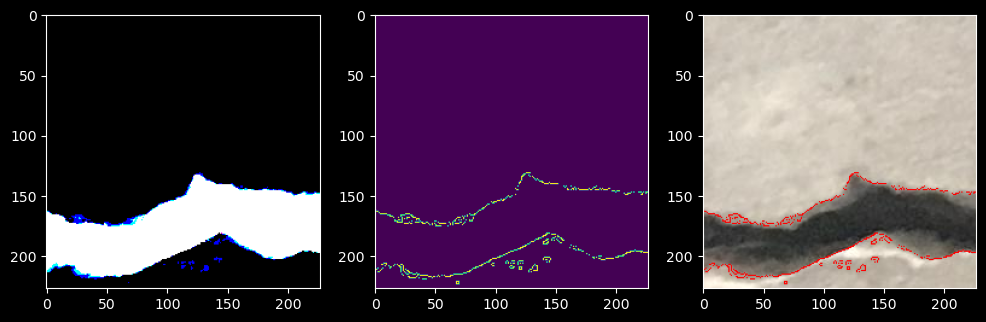

In [27]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

Reading_Img = cv2.imread(Main_Surface_Data["JPG"][4])
Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)

_,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
Canny_Img = cv2.Canny(Threshold_Img,90,100)
contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Contours = cv2.drawContours(Reading_Img,contours,-1,(255,0,0),1)

axis[0].imshow(Threshold_Img)
axis[1].imshow(Canny_Img)
axis[2].imshow(Draw_Contours)

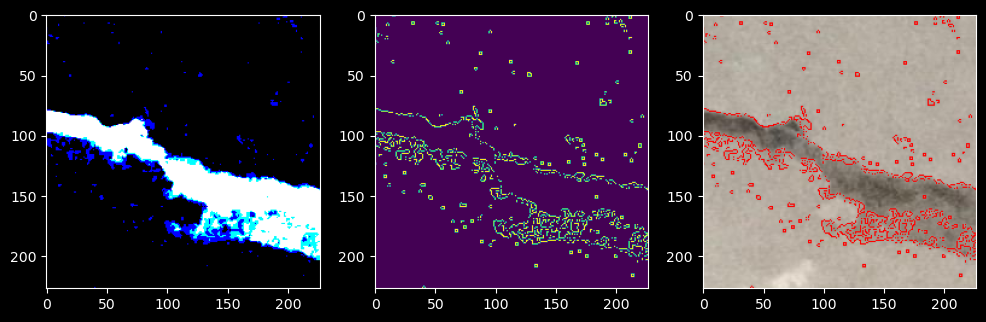

In [28]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

Reading_Img = cv2.imread(Main_Surface_Data["JPG"][2])
Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)

_,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
Canny_Img = cv2.Canny(Threshold_Img,90,100)
contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Contours = cv2.drawContours(Reading_Img,contours,-1,(255,0,0),1)

axis[0].imshow(Threshold_Img)
axis[1].imshow(Canny_Img)
axis[2].imshow(Draw_Contours)

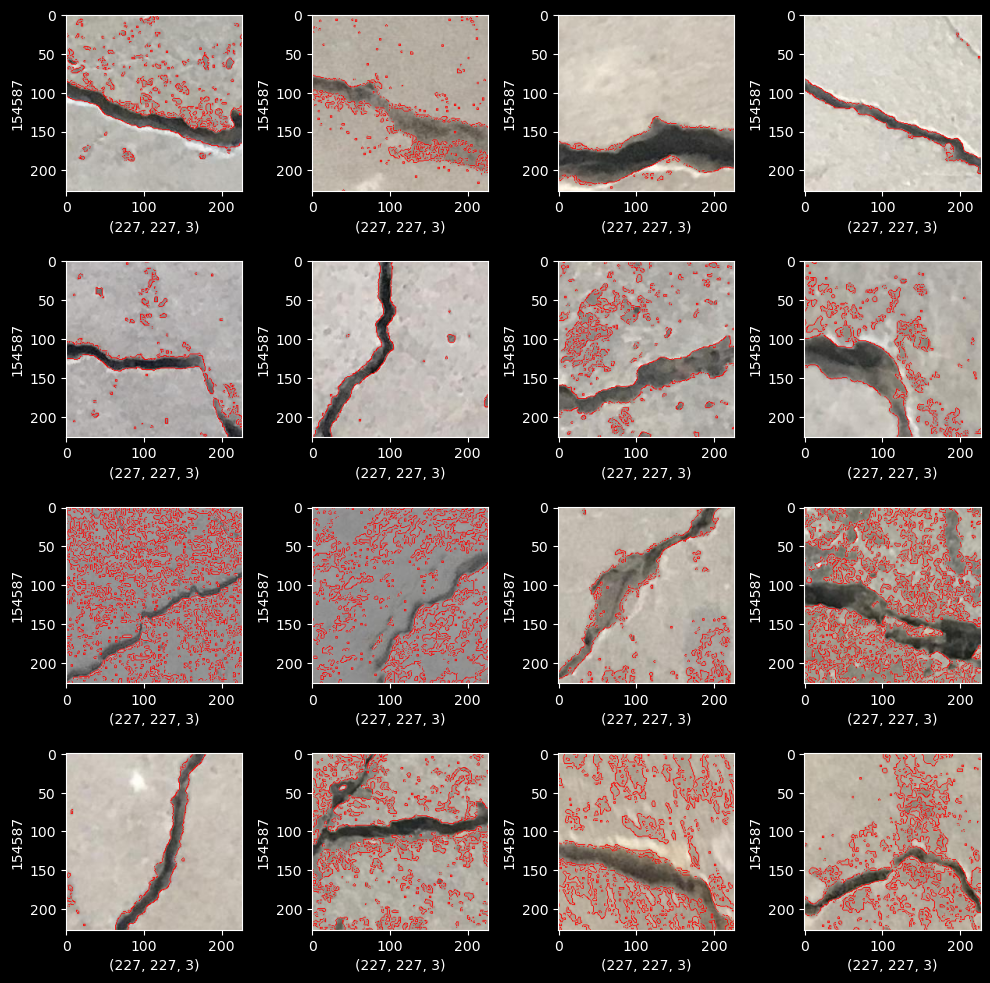

In [29]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img,90,100)
    contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Contours_Positive = cv2.drawContours(Reading_Img,contours,-1,(255,0,0),1)
    
    operations.set_xlabel(Draw_Contours_Positive.shape)
    operations.set_ylabel(Draw_Contours_Positive.size)
    operations.imshow(Draw_Contours_Positive)
    
plt.tight_layout()
plt.show()

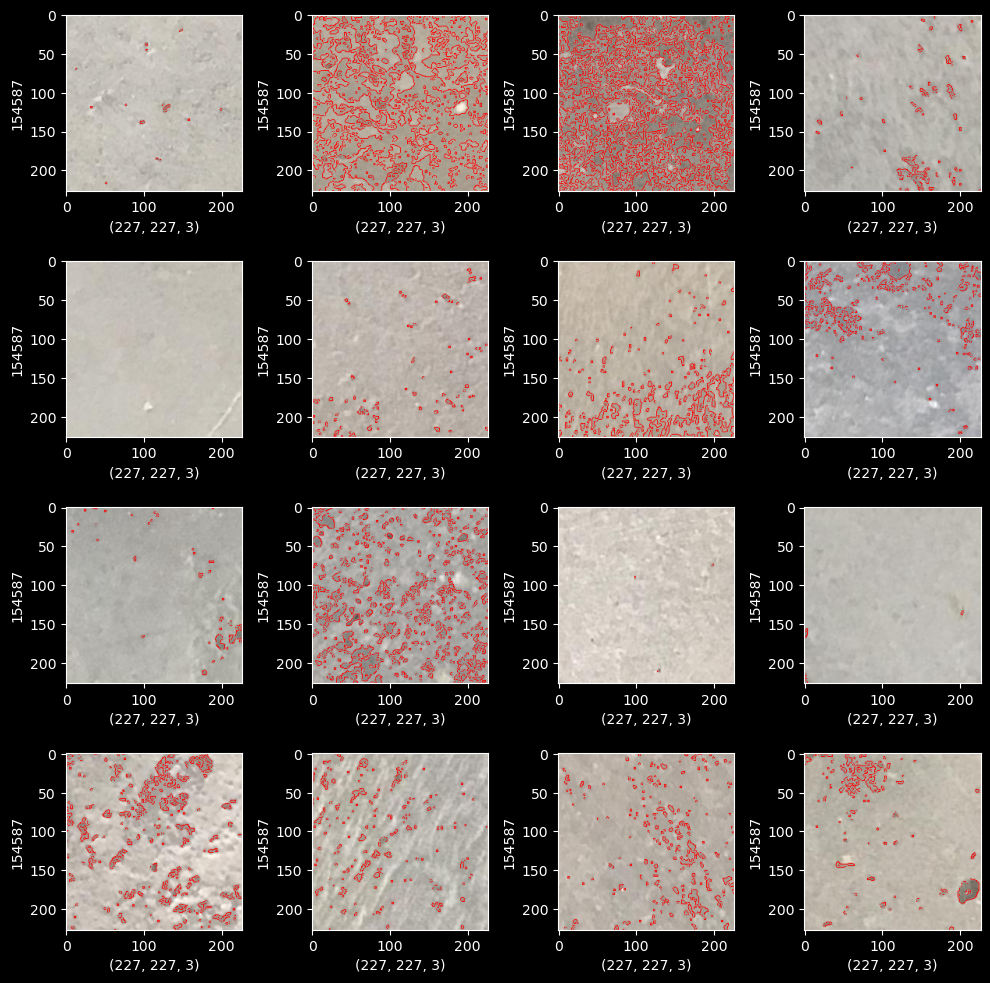

In [30]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Negative_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img,90,100)
    contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Contours_Negative = cv2.drawContours(Reading_Img,contours,-1,(255,0,0),1)
    
    operations.set_xlabel(Draw_Contours_Negative.shape)
    operations.set_ylabel(Draw_Contours_Negative.size)
    operations.imshow(Draw_Contours_Negative)
    
plt.tight_layout()
plt.show()

In [31]:
xTrain,xTest = train_test_split(Main_Surface_Data,train_size=0.9,shuffle=True,random_state=42)

In [32]:
print(xTrain.shape)
print(xTest.shape)

(36000, 2)
(4000, 2)


In [33]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.5,
                                        zoom_range=0.5,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        brightness_range=[0.6,0.9],
                                        vertical_flip=True,
                                        validation_split=0.1)

In [34]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)

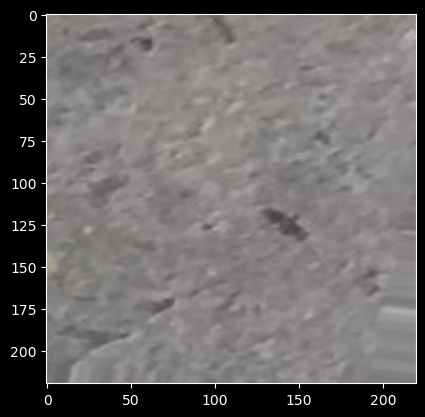

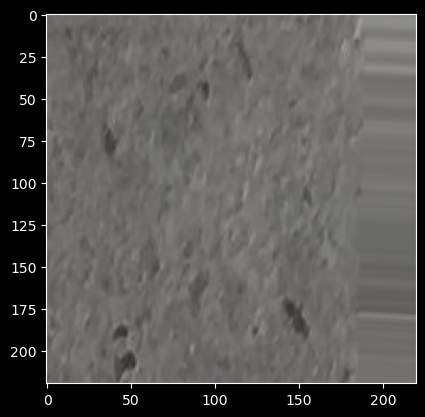

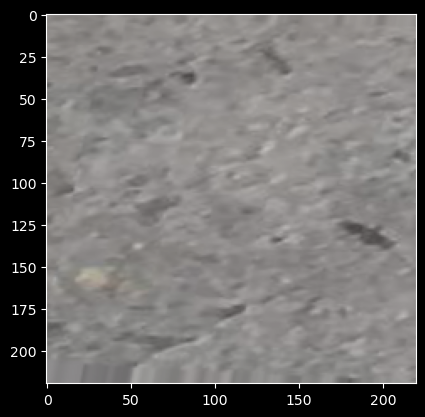

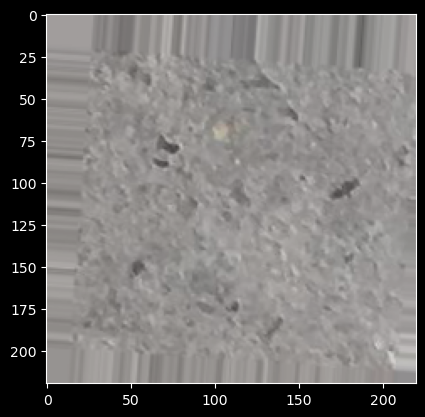

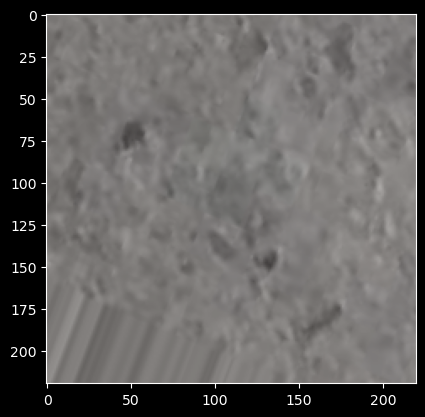

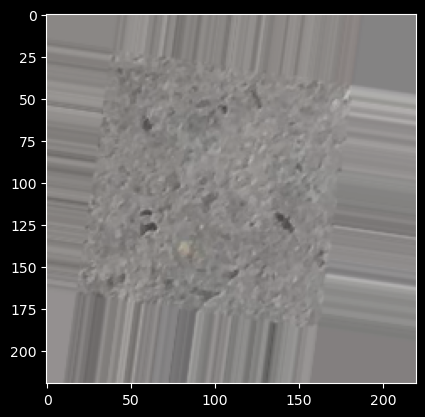

In [35]:

Example_Surface_Img = Main_Surface_Data["JPG"][444]
Loading_Img = image.load_img(Example_Surface_Img,target_size=(220,220))
Array_Img = image.img_to_array(Loading_Img)
Array_Img = Array_Img.reshape((1,) + Array_Img.shape)

i = 0

for batch in Train_IMG_Generator.flow(Array_Img,batch_size=32):
    plt.figure(i)
    Image_Out = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    
    if i % 6 == 0:
        break

plt.show(
)

In [36]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=xTrain,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   target_size=(200,200),
                                                   subset="training",
                                                    batch_size=32,
                                                    seed=32)

Found 32400 validated image filenames belonging to 2 classes.


In [37]:
Validation_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=xTrain,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   target_size=(200,200),
                                                   subset="validation",
                                                    batch_size=32,
                                                    seed=32)

Found 3600 validated image filenames belonging to 2 classes.


In [38]:
Test_Set = Test_IMG_Generator.flow_from_dataframe(dataframe=xTest,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   target_size=(200,200),
                                                    batch_size=32,
                                                    seed=32)

Found 4000 validated image filenames belonging to 2 classes.


In [39]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'Negative': 0, 'Positive': 1}
[0, 1, 1, 0, 0]
(200, 200, 3)
------------------------------------------------------------
VALIDATION: 
{'Negative': 0, 'Positive': 1}
[1, 0, 1, 0, 0]
(200, 200, 3)
------------------------------------------------------------
TEST: 
{'Negative': 0, 'Positive': 1}
[0, 1, 0, 0, 1]
(200, 200, 3)


In [40]:
print(Train_Set.image_shape[0],Train_Set.image_shape[1],Train_Set.image_shape[2])

200 200 3


In [41]:
compile_optimizer = "adam"
compile_loss = "binary_crossentropy"
input_dim = (Train_Set.image_shape[0],Train_Set.image_shape[1],Train_Set.image_shape[2])
class_dim = 1

In [47]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3, mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck.weights.h5")

In [48]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",input_shape=input_dim))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(1024,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(class_dim,activation="sigmoid"))

In [49]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=["accuracy"])

In [63]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=2)

Epoch 1/2
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 522s 514ms/step - accuracy: 0.9865 - loss: 0.0473 - val_accuracy: 0.9761 - val_loss: 0.0662
Epoch 2/2
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 521s 514ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.9914 - val_loss: 0.0341


In [65]:
print(Model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 99, 99, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 49, 49, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 49, 49, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    37,749,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,417,861 (436.47 MB)

 Trainable params: 38,139,265 (145.49 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 76,278,532 (290.98 MB)

None


In [66]:
Model.save("Model_Last_Prediction.h5")

<Axes: >

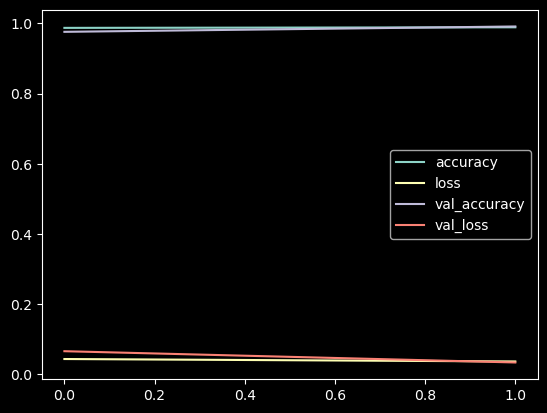

In [67]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

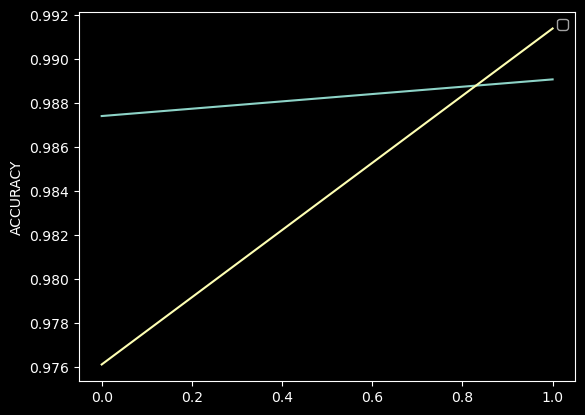

In [68]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

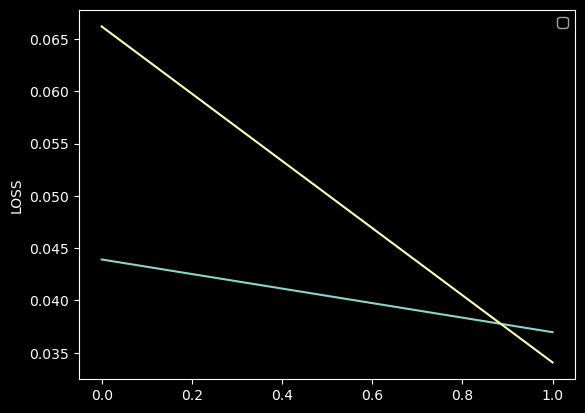

In [69]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [70]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9947 - loss: 0.0213
LOSS:  0.0208
ACCURACY:  1.00


In [71]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)
print(Model_Test_Prediction)

125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step
[0 0 0 ... 0 0 0]


In [75]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction_Classes = np.argmax(Model_Test_Prediction, axis=1)
print(Model_Test_Prediction_Classes)


125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
[0 0 0 ... 0 0 0]


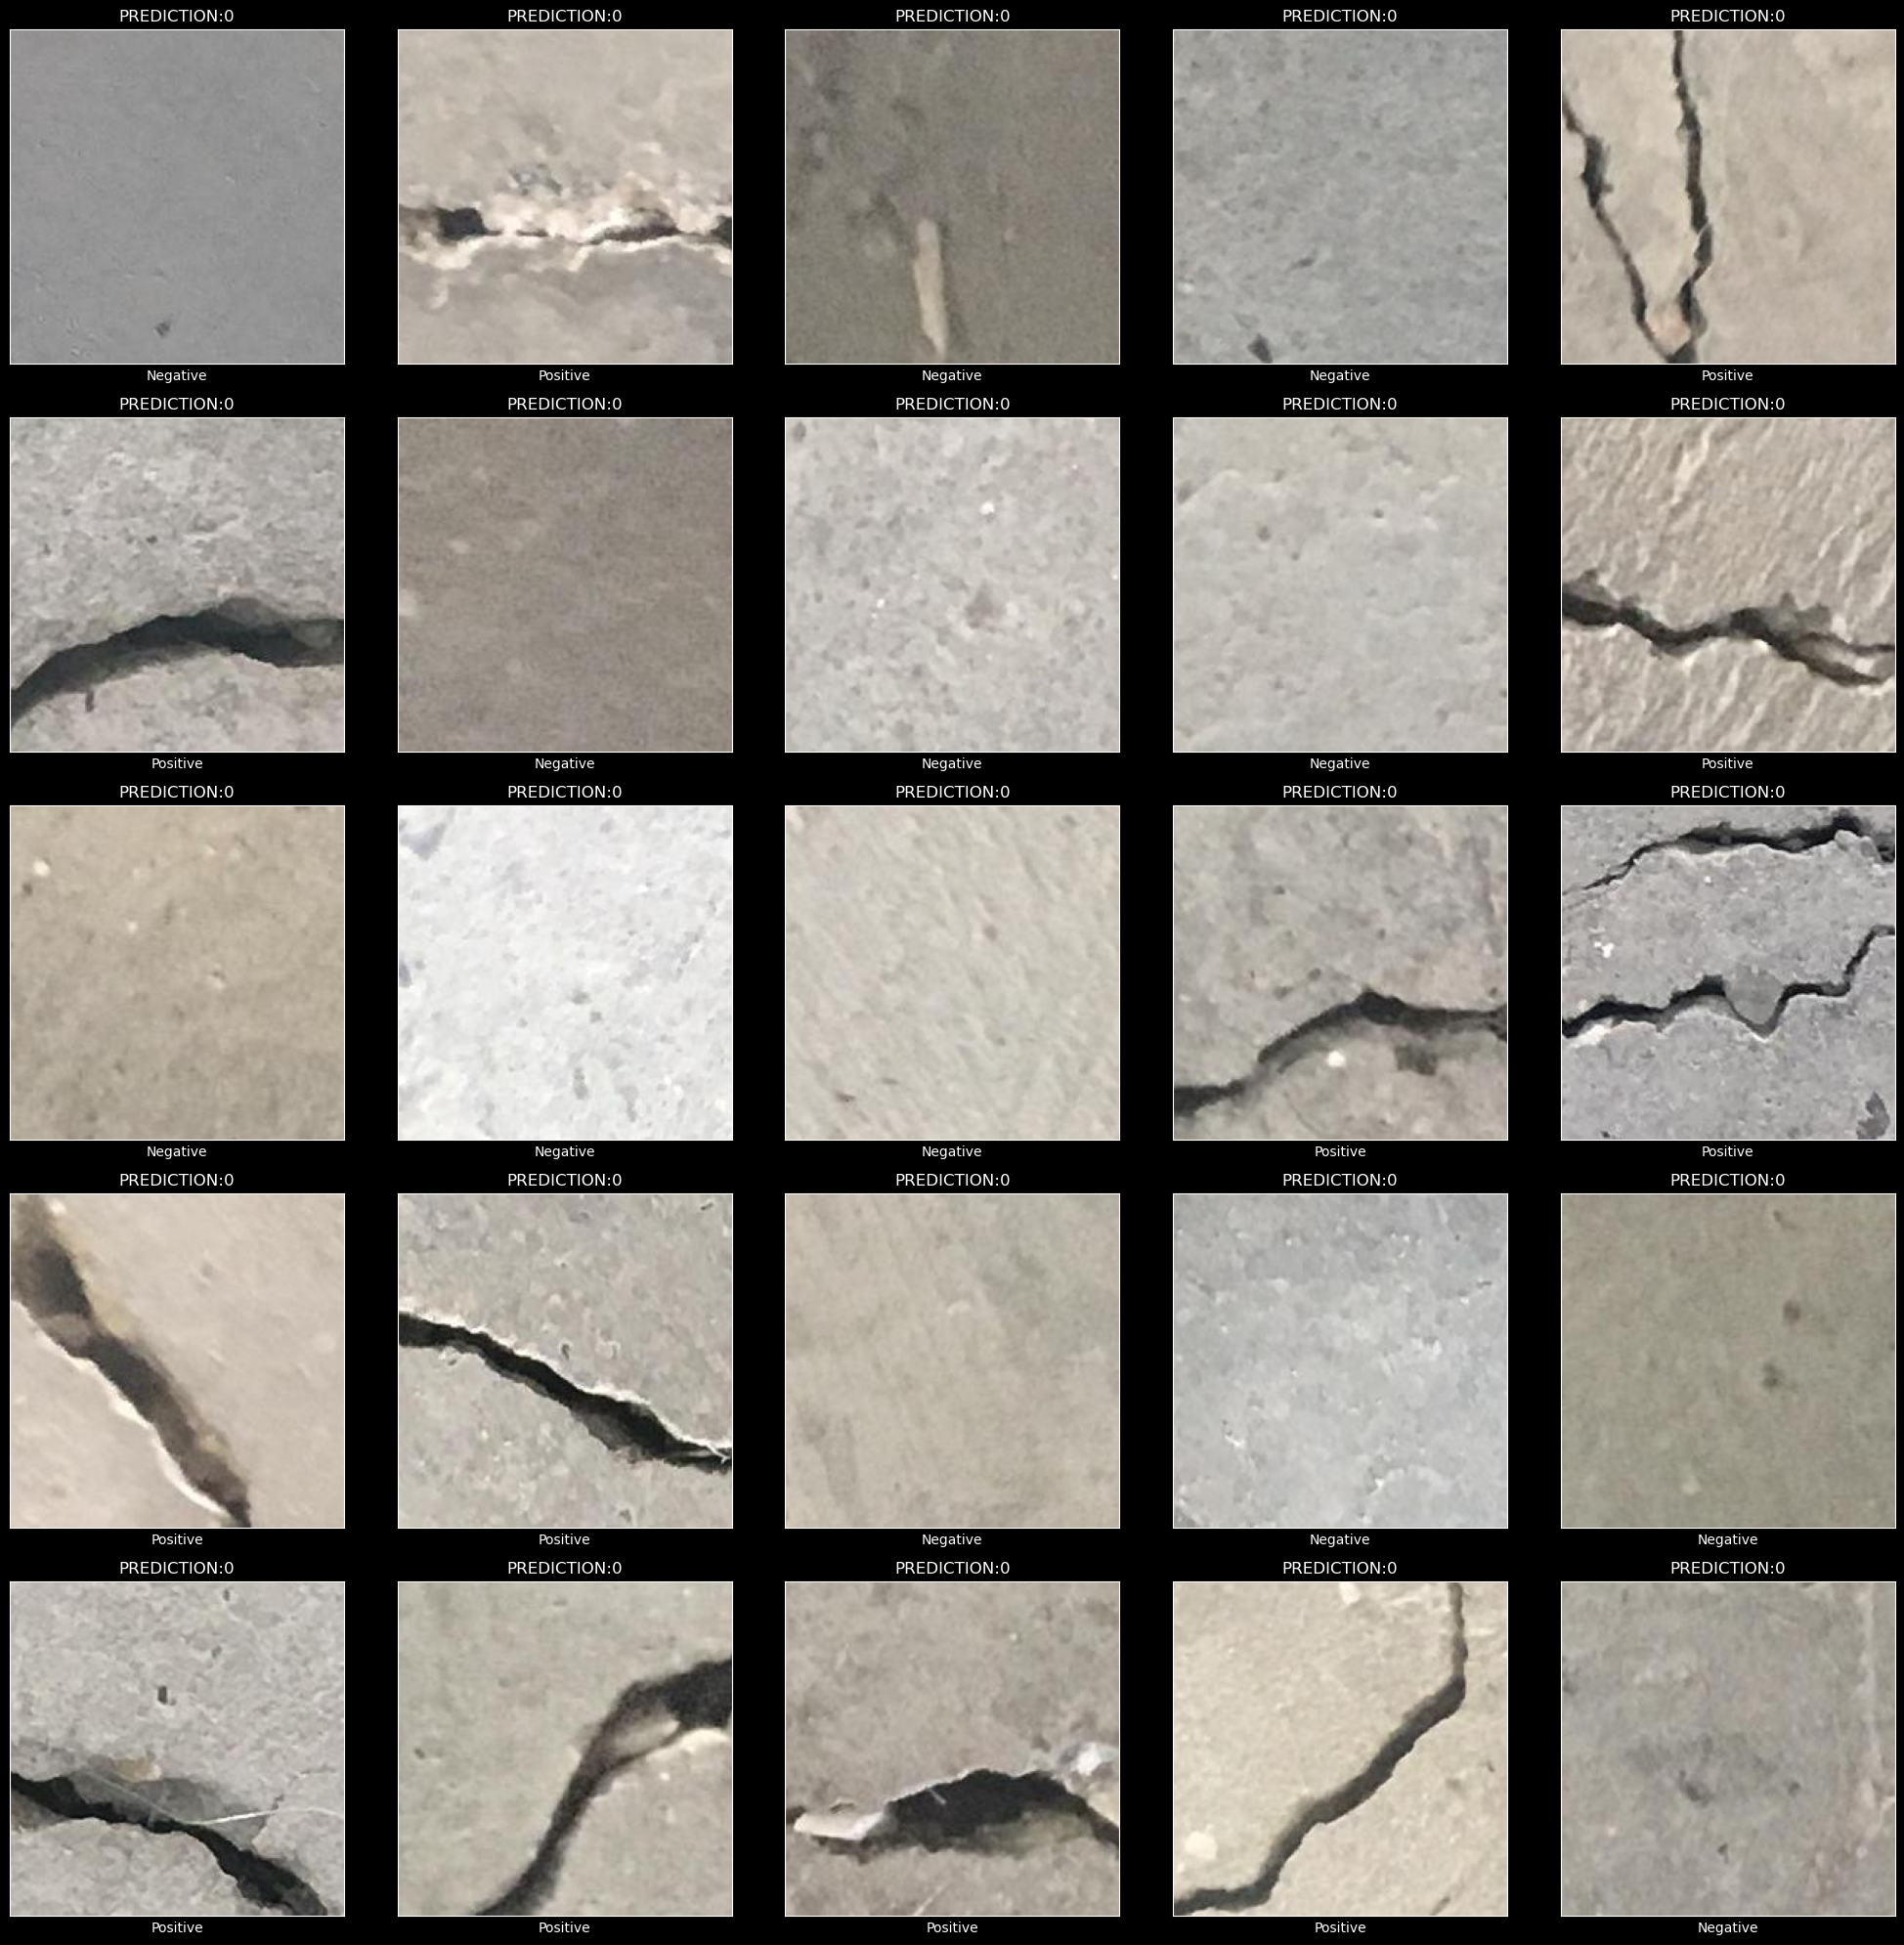

In [78]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(xTest["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_Classes[i]}")
    ax.set_xlabel(xTest["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()